In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun May  5 22:12:32 2019

@author: Pias Tanmoy
"""



from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.utils import np_utils
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.utils import shuffle
import pandas as pd
from keras.callbacks import ModelCheckpoint


N_EPOCH = 10
BATCH_SIZE = 5
VERBOSE = 1
N_CLASS = 10
OPTIMIZER = Adam()
N_HIDDEN_1 = 128
VALIDATION_SPLIT = 0.1
RESHAPE = 784
DROPOUT = 0.1


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
Train = pd.read_csv('drive/My Drive/Google_Colab/HAR_Male_Female/dataset_watch.csv')
Train = np.array(Train)
Train = shuffle(Train)

X_train = Train[:, :6]
y_train = Train[:, 6:7]

y_train = y_train.astype('int')


INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = np.unique(y_train).shape[0]
N_CLASS = OUTPUT_DIM

print(INPUT_DIM, OUTPUT_DIM)

6 2


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)




In [0]:
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adagrad
from keras.optimizers import Adadelta

def create_model():
  classifier = Sequential()
  classifier.add(Dense(units = 500, activation='relu', kernel_initializer='glorot_uniform', input_dim=INPUT_DIM))
  classifier.add(Dropout(DROPOUT))
  classifier.add(Dense(units = 100, activation='relu', kernel_initializer = 'glorot_uniform'))
  classifier.add(Dropout(DROPOUT))
  classifier.add(Dense(units = 200, activation='relu', kernel_initializer = 'glorot_uniform'))
  classifier.add(Dropout(DROPOUT))
  classifier.add(Dense(units = 50, activation='relu', kernel_initializer = 'glorot_uniform'))
  classifier.add(Dropout(DROPOUT))
  classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
  classifier.compile(optimizer = Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])
  model = classifier
  
  return model

In [6]:
model = create_model()
BATCH_SIZE = 10
history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, 
                    epochs = 10, verbose = VERBOSE, 
                    validation_split=VALIDATION_SPLIT,
                    shuffle = True)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 11567 samples, validate on 1286 samples
Epoch 1/10
11567/11567 [==============================] - 4s 349us/step - loss: 0.2915 - acc: 0.8961 - val_loss: 0.2503 - val_acc: 0.8974
Epoch 2/10
11567/11567 [==============================] - 3s 273us/step - loss: 0.2502 - acc: 0.9079 - val_loss: 0.2373 - val_acc: 0.9067
Epoch 3/10
11567/11567 [==============================] - 3s 271us/step - loss: 0.2394 - acc: 0.9119 - val_loss: 0.2260 - val_acc: 0.9090
Epoch 4/10
11567/11567 [==============================] - 3s 274us/step - loss: 0.2353 - acc: 0.9120 - val_loss: 0.2163 - val_acc: 0.9090
Epoch 5/10
11567/11567 [==============================] - 3s 269us/step - loss: 0.2257 - acc: 0.9168 - val_loss: 0.2321 - val_acc: 0.9012
Epoch 6/10
11567/11567 [==============================] - 3s 269us/step - loss: 0.2219 - acc: 0.91

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


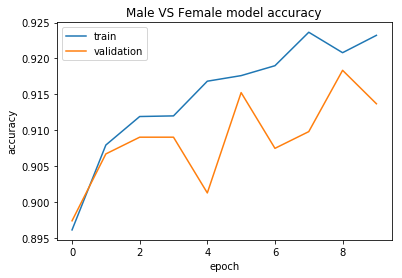

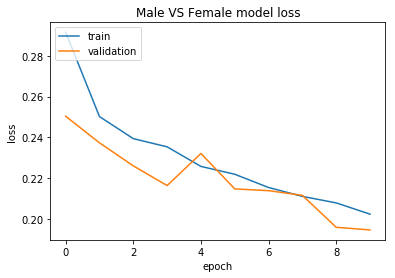

In [7]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Male VS Female model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('Training_Accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

#files.download( "Training_Accuracy.png" )

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Male VS Female model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('Training_loss.png', dpi=300, bbox_inches='tight')
plt.show()

#files.download( "Training_loss.png" )

In [0]:
from google.colab import files
files.download( "Training_Accuracy.png" )
files.download( "Training_loss.png" )